In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
#import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
Train_Data = pd.read_csv('static_train_data.csv')

Test_Data = pd.read_csv('static_test_data.csv')

In [3]:
Train_Data['admittime'] = pd.to_datetime(Train_Data['admittime'])
Train_Data['dischtime'] = pd.to_datetime(Train_Data['dischtime'])

# ICU in time, hospital out time
#Train_Data['LOS(ICU)'] = (Train_Data['dischtime'] - 
                     #ICUSTAYS['INTIME']).dt.total_seconds()/86400

#In/out to the hospital
Train_Data['LOS'] = (Train_Data['dischtime'] - 
                     Train_Data['admittime']).dt.total_seconds()/86400

In [4]:
Test_Data['admittime'] = pd.to_datetime(Test_Data['admittime'])
Test_Data['dischtime'] = pd.to_datetime(Test_Data['dischtime'])

# ICU in time, hospital out time
#Train_Data['LOS(ICU)'] = (Train_Data['dischtime'] - 
                     #ICUSTAYS['INTIME']).dt.total_seconds()/86400

#In/out to the hospital
Test_Data['LOS'] = (Test_Data['dischtime'] - 
                     Test_Data['admittime']).dt.total_seconds()/86400

In [5]:
Train_Data[['admittime', 'dischtime', 'LOS']].head()

,admittime,dischtime,LOS
0,2195-09-17 14:12:00,2195-09-19 21:02:00,2.284722
1,2124-07-03 14:00:00,2124-07-08 12:30:00,4.937500
2,2187-04-02 14:16:00,2187-04-19 16:26:00,17.090278
3,2154-12-11 13:40:00,2154-12-18 13:18:00,6.984722
4,2201-03-04 09:30:00,2201-03-12 15:30:00,8.250000


In [6]:
Test_Data[['admittime', 'dischtime', 'LOS']].head()

,admittime,dischtime,LOS
0,2138-06-10 16:13:00,2138-06-17 12:45:00,6.855556
1,2196-09-27 18:10:00,2196-10-26 18:31:00,29.014583
2,2192-08-23 18:37:00,2192-08-25 13:09:00,1.772222
3,2126-08-13 14:00:00,2126-08-19 14:00:00,6.000000
4,2189-11-25 05:30:00,2189-12-24 15:37:00,29.421528


In [7]:
Train_Data['LOS'].describe()

count    23392.000000
mean        10.049370
std         10.950239
min         -0.229167
25%          4.099306
50%          6.946528
75%         12.005903
max        294.660417
Name: LOS, dtype: float64

In [8]:
Test_Data['LOS'].describe()

count    7310.000000
mean       10.029380
std        10.784332
min         0.012500
25%         4.043056
50%         6.949653
75%        11.950347
max       181.892361
Name: LOS, dtype: float64

In [9]:
Train_Data[Train_Data['LOS'] < 0]

,Unnamed: 0,subject_id,hadm_id,icustay_id,anytime_expire_flag,hospital_expire_flag,icu_expire_flag,time_of_death,time_until_death,hours_until_death,...,blood,acute,failure,cancer,back,bone,pain,other,totalcats,LOS
991,991,45104,127436,249259,0,0,0,NaN,NaN,103018.0,...,0,0,0,0,0,0,0,0,1,-0.229167
3510,3510,83967,182476,299943,0,0,0,NaN,NaN,103018.0,...,0,0,0,0,0,0,1,0,2,-0.217361
4966,4966,31644,195619,270822,0,0,0,NaN,NaN,103018.0,...,0,0,0,0,0,0,0,1,0,-0.204861
23128,23128,11983,129454,207034,0,0,0,NaN,NaN,103018.0,...,0,0,0,0,0,0,0,1,0,-0.091667


In [10]:
Test_Data[Test_Data['LOS'] < 0]

,Unnamed: 0,subject_id,hadm_id,icustay_id,anytime_expire_flag,hospital_expire_flag,icu_expire_flag,time_of_death,time_until_death,hours_until_death,...,blood,acute,failure,cancer,back,bone,pain,other,totalcats,LOS


In [11]:
Train_Data = Train_Data[Train_Data['LOS'] > 0]
Test_Data = Test_Data[Test_Data['LOS'] > 0]

In [12]:
Train_Data['LOS'].describe()

count    23388.000000
mean        10.051120
std         10.950357
min          0.004167
25%          4.100694
50%          6.947222
75%         12.006944
max        294.660417
Name: LOS, dtype: float64

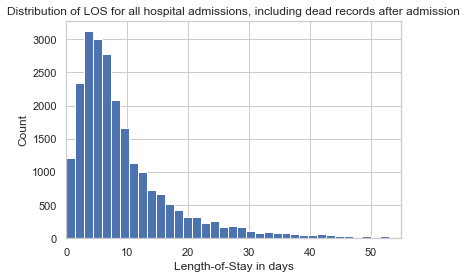

In [13]:
sns.set(style="whitegrid")
plt.hist(Train_Data['LOS'], bins=200)
plt.xlim(0, 55)
plt.title('Distribution of LOS for all hospital admissions, including dead records after admission')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay in days')
plt.tick_params(top=False, right=False) 
plt.show()

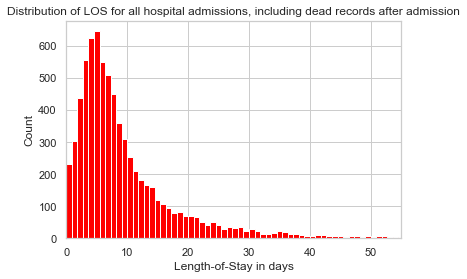

In [14]:
sns.set(style="whitegrid")
plt.hist(Test_Data['LOS'], bins=200,color = 'red')
plt.xlim(0, 55)
plt.title('Distribution of LOS for all hospital admissions, including dead records after admission')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay in days')
plt.tick_params(top=False, right=False) 
plt.show()

In [15]:
# 1: died, 0: not dead.
Train_Data['deceased'] = Train_Data['time_of_death'].notnull().map({True:1, False:0})
Test_Data['deceased'] = Test_Data['time_of_death'].notnull().map({True:1, False:0})


In [16]:
print("{} of {} patients died in the hospital in the training data"
      .format(Train_Data['deceased'].sum(), Train_Data['subject_id']
              .nunique()))
print("{} of {} patients died in the hospital in the testing data"
      .format(Test_Data['deceased'].sum(), Test_Data['subject_id']
              .nunique()))

9153 of 23388 patients died in the hospital in the training data
2765 of 7310 patients died in the hospital in the testing data


In [17]:
Train_Data['hours_until_leave_ICU'].loc[Train_Data['deceased'] == 0].describe()

count    14235.000000
mean        82.040674
std        116.511774
min          0.000000
25%         27.000000
50%         46.000000
75%         81.000000
max       2441.000000
Name: hours_until_leave_ICU, dtype: float64

In [18]:
Train_Data['LOS'].loc[Train_Data['deceased'] == 0].describe()

count    14235.000000
mean         9.024471
std          9.316243
min          0.089583
25%          3.991667
50%          6.379167
75%         10.693056
max        202.762500
Name: LOS, dtype: float64

In [19]:
Test_Data['LOS'].loc[Test_Data['deceased'] == 0].describe()

count    4545.000000
mean        9.248567
std        10.015300
min         0.055556
25%         3.940278
50%         6.502778
75%        10.713194
max       163.246528
Name: LOS, dtype: float64

In [20]:
Test_Data['hours_until_leave_ICU'].loc[Test_Data['deceased'] == 0].describe()

count    4545.000000
mean       84.449065
std       126.196968
min         0.000000
25%        27.000000
50%        46.000000
75%        83.000000
max      1842.000000
Name: hours_until_leave_ICU, dtype: float64

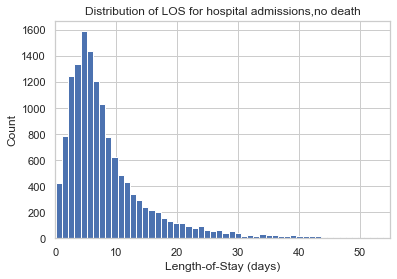

In [21]:
sns.set(style="whitegrid")
plt.hist(Train_Data['LOS'].loc[Train_Data['deceased'] == 0], bins=200)
plt.xlim(0, 55)
plt.title('Distribution of LOS for hospital admissions,no death')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.tick_params(top=False, right=False) 
plt.show()

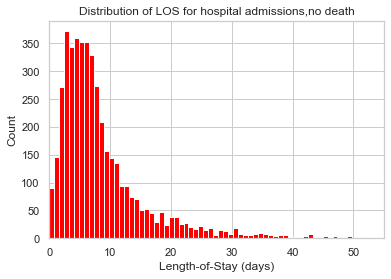

In [22]:
sns.set(style="whitegrid")
plt.hist(Test_Data['LOS'].loc[Test_Data['deceased'] == 0], bins=200,color = 'red')
plt.xlim(0, 55)
plt.title('Distribution of LOS for hospital admissions,no death')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.tick_params(top=False, right=False) 
plt.show()

In [23]:
Train_Data['first_careunit'].value_counts().index.tolist()
Test_Data['first_careunit'].value_counts().index.tolist()

['MICU', 'CSRU', 'SICU', 'CCU', 'TSICU']

In [24]:
Train_Data['first_careunit'].replace({'CCU': 'ICU', 'CSRU': 'ICU', 'MICU': 'ICU',
                                  'SICU': 'ICU', 'TSICU': 'ICU'}, inplace=True)

Test_Data['first_careunit'].replace({'CCU': 'ICU', 'CSRU': 'ICU', 'MICU': 'ICU',
                                  'SICU': 'ICU', 'TSICU': 'ICU'}, inplace=True)


In [25]:
Train_Data['first_careunit'].value_counts().index.tolist()
Test_Data['first_careunit'].value_counts().index.tolist()

['ICU']

In [26]:
Train_Data['first_careunit'].value_counts()


ICU    23388
Name: first_careunit, dtype: int64

In [27]:
Test_Data['first_careunit'].value_counts()

ICU    7310
Name: first_careunit, dtype: int64

In [28]:
Train_Data['CAT'] = Train_Data['first_careunit']
Train_Data_CAT_Lst = Train_Data.groupby('hadm_id')['CAT'].apply(list).reset_index()
Train_Data_CAT_Lst.head()

,hadm_id,CAT
0,100007,[ICU]
1,100009,[ICU]
2,100018,[ICU]
3,100019,[ICU]
4,100024,[ICU]


In [29]:
Test_Data['CAT'] = Test_Data['first_careunit']
Test_Data_CAT_Lst = Test_Data.groupby('hadm_id')['CAT'].apply(list).reset_index()
Test_Data_CAT_Lst.head()

,hadm_id,CAT
0,100001,[ICU]
1,100021,[ICU]
2,100030,[ICU]
3,100040,[ICU]
4,100046,[ICU]


In [30]:
ICU = pd.get_dummies(Train_Data_CAT_Lst['CAT'].apply(pd.Series).stack()).sum(level=0)
ICU[ICU >= 1] = 1

In [31]:
ICU_test = pd.get_dummies(Test_Data_CAT_Lst['CAT'].apply(pd.Series).stack()).sum(level=0)
ICU_test[ICU_test >= 1] = 1


In [32]:
ICU = ICU.join(Train_Data_CAT_Lst['hadm_id'], how="outer")
ICU.head()

,ICU,hadm_id
0,1,100007
1,1,100009
2,1,100018
3,1,100019
4,1,100024


In [33]:
ICU_test = ICU_test.join(Test_Data_CAT_Lst['hadm_id'], how="outer")
ICU_test.head()

,ICU,hadm_id
0,1,100001
1,1,100021
2,1,100030
3,1,100040
4,1,100046


In [34]:
Train_Data = Train_Data.merge(ICU, how='outer', on='hadm_id')

In [35]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23388 entries, 0 to 23387
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 23388 non-null  int64         
 1   subject_id                 23388 non-null  int64         
 2   hadm_id                    23388 non-null  int64         
 3   icustay_id                 23388 non-null  int64         
 4   anytime_expire_flag        23388 non-null  int64         
 5   hospital_expire_flag       23388 non-null  int64         
 6   icu_expire_flag            23388 non-null  int64         
 7   time_of_death              9153 non-null   object        
 8   time_until_death           9153 non-null   object        
 9   hours_until_death          23388 non-null  float64       
 10  days_until_death           9153 non-null   float64       
 11  admittime                  23388 non-null  datetime64[ns]
 12  disc

In [36]:
Test_Data = Test_Data.merge(ICU_test, how='outer', on='hadm_id')

In [37]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7310 entries, 0 to 7309
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 7310 non-null   int64         
 1   subject_id                 7310 non-null   int64         
 2   hadm_id                    7310 non-null   int64         
 3   icustay_id                 7310 non-null   int64         
 4   anytime_expire_flag        7310 non-null   int64         
 5   hospital_expire_flag       7310 non-null   int64         
 6   icu_expire_flag            7310 non-null   int64         
 7   time_of_death              2765 non-null   object        
 8   time_until_death           2765 non-null   object        
 9   hours_until_death          7310 non-null   float64       
 10  days_until_death           2765 non-null   float64       
 11  admittime                  7310 non-null   datetime64[ns]
 12  discht

In [38]:
Train_Data['ICU'].fillna(value=0, inplace=True)
Test_Data['ICU'].fillna(value=0, inplace=True)

In [39]:
Train_Data.ICU.value_counts(dropna=False)

1    23388
Name: ICU, dtype: int64

In [40]:
Test_Data.ICU.value_counts(dropna=False)

1    7310
Name: ICU, dtype: int64

In [41]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23388 entries, 0 to 23387
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 23388 non-null  int64         
 1   subject_id                 23388 non-null  int64         
 2   hadm_id                    23388 non-null  int64         
 3   icustay_id                 23388 non-null  int64         
 4   anytime_expire_flag        23388 non-null  int64         
 5   hospital_expire_flag       23388 non-null  int64         
 6   icu_expire_flag            23388 non-null  int64         
 7   time_of_death              9153 non-null   object        
 8   time_until_death           9153 non-null   object        
 9   hours_until_death          23388 non-null  float64       
 10  days_until_death           9153 non-null   float64       
 11  admittime                  23388 non-null  datetime64[ns]
 12  disc

In [42]:
PATIENTS = pd.read_csv('PATIENTS.csv')

In [43]:
PATIENTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       46520 non-null  int64 
 1   SUBJECT_ID   46520 non-null  int64 
 2   GENDER       46520 non-null  object
 3   DOB          46520 non-null  object
 4   DOD          15759 non-null  object
 5   DOD_HOSP     9974 non-null   object
 6   DOD_SSN      13378 non-null  object
 7   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [44]:
PATIENTS['GENDER'].value_counts()

M    26121
F    20399
Name: GENDER, dtype: int64

In [45]:
PATIENTS['DOB'] = pd.to_datetime(PATIENTS['DOB'])

In [46]:
PATIENTS.drop(columns=['ROW_ID','DOD_HOSP','DOD_SSN',
                       'EXPIRE_FLAG','DOD','GENDER'], inplace=True)

In [47]:
PATIENTS.head()

,SUBJECT_ID,DOB
0,249,2075-03-13
1,250,2164-12-27
2,251,2090-03-15
3,252,2078-03-06
4,253,2089-11-26


In [48]:
PATIENTS = PATIENTS.rename(columns={'SUBJECT_ID': 'subject_id'})
PATIENTS.head()

,subject_id,DOB
0,249,2075-03-13
1,250,2164-12-27
2,251,2090-03-15
3,252,2078-03-06
4,253,2089-11-26


In [49]:
Train_Data = Train_Data.merge(PATIENTS, how='inner', on='subject_id')

In [50]:
Test_Data = Test_Data.merge(PATIENTS, how='inner', on='subject_id')

In [51]:
age = Train_Data[['subject_id', 'admittime']].groupby('subject_id').min().reset_index()
age.columns = ['subject_id', 'ADMITTIME_earliest']
age.head()

,subject_id,ADMITTIME_earliest
0,3,2101-10-20 19:08:00
1,4,2191-03-16 00:28:00
2,9,2149-11-09 13:06:00
3,11,2178-04-16 06:18:00
4,13,2167-01-08 18:43:00


In [52]:
age_test = Test_Data[['subject_id', 'admittime']].groupby('subject_id').min().reset_index()
age_test.columns = ['subject_id', 'ADMITTIME_earliest']
age_test.head()

,subject_id,ADMITTIME_earliest
0,6,2175-05-30 07:15:00
1,22,2196-04-09 12:26:00
2,24,2139-06-06 16:14:00
3,26,2126-05-06 15:16:00
4,35,2122-02-10 11:15:00


In [53]:
Train_Data = Train_Data.merge(age, how='outer', on='subject_id')
Test_Data = Test_Data.merge(age_test, how='outer', on='subject_id')

In [54]:
Train_Data['ADMITTIME_earliest'] = pd.to_datetime(Train_Data['ADMITTIME_earliest'])

Test_Data['ADMITTIME_earliest'] = pd.to_datetime(Test_Data['ADMITTIME_earliest'])


In [55]:
Train_Data['DOB'] = pd.to_datetime(Train_Data['DOB'])

Test_Data['DOB'] = pd.to_datetime(Test_Data['DOB'])

In [56]:
Train_Data['age'] = Train_Data['ADMITTIME_earliest'].subtract(Train_Data['DOB']).dt.days // 365

Train_Data['age'] = np.where(Train_Data['age'] < 0, 90, Train_Data['age'])
Train_Data['age'] = np.where(Train_Data['age'] == -0, 0, Train_Data['age'])

In [57]:
Test_Data['age'] = Test_Data['ADMITTIME_earliest'].subtract(Test_Data['DOB']).dt.days // 365

Test_Data['age'] = np.where(Test_Data['age'] < 0, 90, Test_Data['age'])
Test_Data['age'] = np.where(Test_Data['age'] == -0, 0, Test_Data['age'])


In [58]:
print('There are {} null value in AGE in this training dataset.'.format(Train_Data['age'].isnull().sum()))

There are 0 null value in AGE in this training dataset.


In [59]:
print('There are {} null value in AGE in this testing dataset.'.format(Test_Data['age'].isnull().sum()))

There are 0 null value in AGE in this testing dataset.


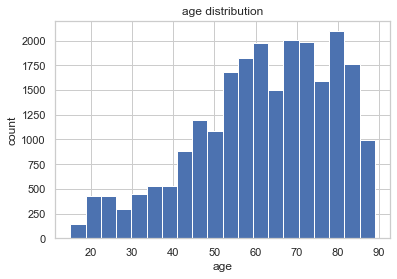

In [60]:
plt.hist(Train_Data['age'], bins=20)
plt.ylabel('count')
plt.xlabel('age')
plt.title('age distribution')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show()

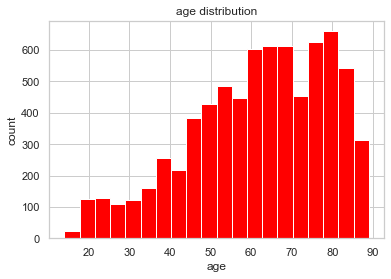

In [61]:
plt.hist(Test_Data['age'], bins=20,color = 'red')
plt.ylabel('count')
plt.xlabel('age')
plt.title('age distribution')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show()

In [62]:
Age_range = [(0, 13), (13, 36), (36, 56), (56, 100)]
for i, range_ in enumerate(Age_range):
    Train_Data['age'] = np.where(Train_Data['age'].between(range_[0],range_[1]), 
            i, Train_Data['age'])
    
cat = {0: 'newborn', 1: 'young_adult', 2: 'middle_adult', 3: 'senior'}
Train_Data['age'] = Train_Data['age'].replace(cat)
Train_Data.age.value_counts()

senior          15314
middle_adult     5956
young_adult      2118
Name: age, dtype: int64

In [63]:
Age_range = [(0, 13), (13, 36), (36, 56), (56, 100)]
for i, range_ in enumerate(Age_range):
    Test_Data['age'] = np.where(Test_Data['age'].between(range_[0],range_[1]), 
            i, Test_Data['age'])
    
cat = {0: 'newborn', 1: 'young_adult', 2: 'middle_adult', 3: 'senior'}
Test_Data['age'] = Test_Data['age'].replace(cat)
Test_Data.age.value_counts()

senior          4732
middle_adult    1912
young_adult      666
Name: age, dtype: int64

In [64]:
Train_Data[['age']].head()

,age
0,senior
1,senior
2,senior
3,senior
4,middle_adult


In [65]:
Test_Data[['age']].head()

,age
0,senior
1,senior
2,senior
3,senior
4,senior


In [66]:
# Create dummy columns for categorical variables
prefixs = ['ADM', 'INS','AGE', 'MAR']
dummy_columns = ['admission_type', 'insurance','age', 'marital_status']

Train_Data = pd.get_dummies(Train_Data, prefix=prefixs, columns=dummy_columns)

Test_Data = pd.get_dummies(Test_Data, prefix=prefixs, columns=dummy_columns)

In [67]:
Train_Data.to_csv('static_train_icu_los.csv')

In [68]:
Test_Data.to_csv('static_test_icu_los.csv')

In [69]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23388 entries, 0 to 23387
Data columns (total 84 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 23388 non-null  int64         
 1   subject_id                 23388 non-null  int64         
 2   hadm_id                    23388 non-null  int64         
 3   icustay_id                 23388 non-null  int64         
 4   anytime_expire_flag        23388 non-null  int64         
 5   hospital_expire_flag       23388 non-null  int64         
 6   icu_expire_flag            23388 non-null  int64         
 7   time_of_death              9153 non-null   object        
 8   time_until_death           9153 non-null   object        
 9   hours_until_death          23388 non-null  float64       
 10  days_until_death           9153 non-null   float64       
 11  admittime                  23388 non-null  datetime64[ns]
 12  disc

In [70]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7310 entries, 0 to 7309
Data columns (total 84 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 7310 non-null   int64         
 1   subject_id                 7310 non-null   int64         
 2   hadm_id                    7310 non-null   int64         
 3   icustay_id                 7310 non-null   int64         
 4   anytime_expire_flag        7310 non-null   int64         
 5   hospital_expire_flag       7310 non-null   int64         
 6   icu_expire_flag            7310 non-null   int64         
 7   time_of_death              2765 non-null   object        
 8   time_until_death           2765 non-null   object        
 9   hours_until_death          7310 non-null   float64       
 10  days_until_death           2765 non-null   float64       
 11  admittime                  7310 non-null   datetime64[ns]
 12  discht

In [71]:
Train_Data.drop(columns=['subject_id', 'hadm_id', 'icustay_id',
                         'time_of_death','time_until_death','hours_until_death','days_until_death',
                         'admittime','dischtime','intime','outtime',
                         'time_until_hospital_exit','days_until_hospital_exit','admission_time_until_icu','hours_until_icu_admission',
                         'time_until_leave_ICU','icu_admit_age','female','dbsource',
                         'first_careunit','diagnosis','CAT','DOB', 'LOS',
                         'ADMITTIME_earliest'],
                inplace=True)

Test_Data.drop(columns=['subject_id', 'hadm_id', 'icustay_id',
                         'time_of_death','time_until_death','hours_until_death','days_until_death',
                         'admittime','dischtime','intime','outtime',
                         'time_until_hospital_exit','days_until_hospital_exit','admission_time_until_icu','hours_until_icu_admission',
                         'time_until_leave_ICU','icu_admit_age','female','dbsource',
                         'first_careunit','diagnosis','CAT','DOB','LOS',
                         'ADMITTIME_earliest'],
                inplace=True)

In [72]:
Train_Data[['hours_until_leave_ICU']].head()

,hours_until_leave_ICU
0,54.0
1,27.0
2,119.0
3,24.0
4,52.0


In [73]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23388 entries, 0 to 23387
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23388 non-null  int64  
 1   anytime_expire_flag    23388 non-null  int64  
 2   hospital_expire_flag   23388 non-null  int64  
 3   icu_expire_flag        23388 non-null  int64  
 4   hours_until_leave_ICU  23388 non-null  float64
 5   icd_blood              23388 non-null  float64
 6   icd_circulatory        23388 non-null  float64
 7   icd_congenital         23388 non-null  float64
 8   icd_digestive          23388 non-null  float64
 9   icd_endocrine          23388 non-null  float64
 10  icd_genitourinary      23388 non-null  float64
 11  icd_infectious         23388 non-null  float64
 12  icd_injury             23388 non-null  float64
 13  icd_mental             23388 non-null  float64
 14  icd_misc               23388 non-null  float64
 15  ic

In [74]:
Train_Data['hours_until_leave_ICU'].loc[Train_Data['deceased'] == 0]

1         27.0
2        119.0
3         24.0
4         52.0
6        395.0
         ...  
23380    192.0
23381     46.0
23382     59.0
23385     25.0
23386    311.0
Name: hours_until_leave_ICU, Length: 14235, dtype: float64

In [75]:
# ICU LOS metrics for model results comparison
actual_mean_icu_los = Train_Data['hours_until_leave_ICU'].loc[Train_Data['deceased'] == 0].mean() 
actual_median_icu_los = Train_Data['hours_until_leave_ICU'].loc[Train_Data['deceased'] == 0].median() 

print(actual_mean_icu_los)
print(actual_median_icu_los)

82.04067439409906
46.0


In [76]:
Test_Data[['hours_until_leave_ICU']].head()

,hours_until_leave_ICU
0,53.0
1,549.0
2,42.0
3,27.0
4,423.0


In [77]:
Train_Data.head()

,Unnamed: 0,anytime_expire_flag,hospital_expire_flag,icu_expire_flag,hours_until_leave_ICU,icd_blood,icd_circulatory,icd_congenital,icd_digestive,icd_endocrine,...,AGE_middle_adult,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,0,1,0,0,54.0,2.0,3.0,0.0,4.0,3.0,...,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,27.0,1.0,5.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,2,0,0,0,119.0,2.0,2.0,0.0,8.0,4.0,...,0,1,0,0,0,0,0,0,0,1
3,3,0,0,0,24.0,2.0,8.0,0.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,1
4,4,0,0,0,52.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0


In [78]:
Test_Data.head()

,Unnamed: 0,anytime_expire_flag,hospital_expire_flag,icu_expire_flag,hours_until_leave_ICU,icd_blood,icd_circulatory,icd_congenital,icd_digestive,icd_endocrine,...,AGE_middle_adult,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,0,0,0,0,53.0,0,4,0,0,2,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,549.0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,1,0,0,42.0,0,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,27.0,1,7,0,1,2,...,0,1,0,0,0,0,0,0,0,1
4,4,0,0,0,423.0,2,1,0,6,1,...,0,1,0,0,0,0,0,0,0,1


In [79]:
# Train Features
features_train = Train_Data.drop(columns=['hours_until_leave_ICU']) # X train
ICU_LOS_train = Train_Data['hours_until_leave_ICU'].values             # Y train 

In [80]:
# Test Features
features_test = Test_Data.drop(columns=['hours_until_leave_ICU'])    # X test
ICU_LOS_test = Test_Data['hours_until_leave_ICU'].values                # Y test

In [81]:
print("Training set has {} samples.".format(ICU_LOS_train.shape[0]))
print("Testing set has {} samples.".format(ICU_LOS_test.shape[0]))

Training set has 23388 samples.
Testing set has 7310 samples.


In [82]:
# Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}
for model in models:
    reg_model = model
    reg_model.fit(features_train, ICU_LOS_train)
    
    y_test_preds = reg_model.predict(features_test)
    name = str(model).split("(")[0]

    results[name] = r2_score(ICU_LOS_test, y_test_preds)
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.


In [83]:
results

{'SGDRegressor': -7.795504176190466e+25,
 'GradientBoostingRegressor': 0.2247165295533592,
 'LinearRegression': 0.19947463535218524,
 'KNeighborsRegressor': -0.10163558402839779,
 'RandomForestRegressor': 0.16789632860564208}

Text(0.5, 1.0, 'Regression Models Comparison')

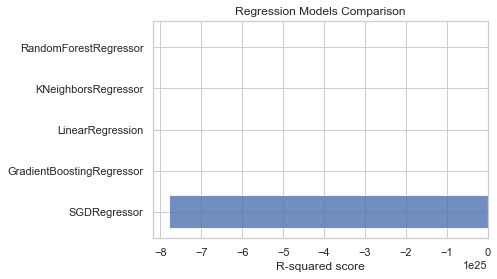

In [84]:
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()),alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Regression Models Comparison')

In [85]:
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(features_train, ICU_LOS_train)
y_test_preds = reg_model.predict(features_test)
r2 = r2_score(ICU_LOS_test, y_test_preds)
print("GradientBoostingRegressor:R2 score is: {:2f}".format(r2))

GradientBoostingRegressor:R2 score is: 0.224717


In [88]:
tuned_parameters = [{'n_estimators': [200, 300],'max_depth' : [3, 4],'loss': ['ls', 'lad']}]

reg_model = GradientBoostingRegressor()  
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(features_train, ICU_LOS_train)
reg_model_optimized = grid.best_estimator_

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

0.20816803085252983
GradientBoostingRegressor(n_estimators=200)


In [89]:
y_test_preds = reg_model_optimized.predict(features_test)
r2_optimized = r2_score(ICU_LOS_test, y_test_preds)
print("Optimized R2 score is: {:2f}".format(r2_optimized))

Optimized R2 score is: 0.229584


In [95]:
feature_importance = pd.DataFrame(reg_model_optimized.feature_importances_,
                                   index = features_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importance.head(10)

,importance
icd_respiratory,0.472603
icd_infectious,0.161525
icd_injury,0.052493
icd_circulatory,0.028884
icd_digestive,0.027877
Unnamed: 0,0.026947
brain,0.018578
infection,0.015185
icd_neoplasms,0.014533
trauma,0.014024


In [97]:
feature_importance.index[0:5].tolist()

['icd_respiratory',
 'icd_infectious',
 'icd_injury',
 'icd_circulatory',
 'icd_digestive']

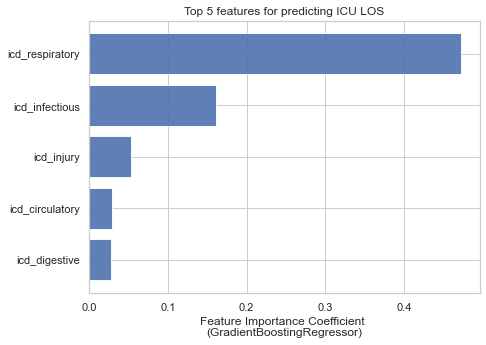

In [102]:
fig, ax = plt.subplots(figsize=(7, 5))
ind = range(0,5)
ax.barh(ind, feature_importance['importance'].values[0:5], 
        align='center', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_importance.index[0:5].tolist())
ax.tick_params(left=False, top=False, right=False) 
ax.set_title("Top 5 features for predicting ICU LOS")
ax.set_xlabel('Feature Importance Coefficient \n(GradientBoostingRegressor)')
plt.gca().invert_yaxis()
#fig.savefig('', bbox_inches = 'tight')


In [111]:
#y_test_preds = reg_model.predict(X_test)

ml_count, md_count, avg_count  = 0, 0, 0
ml_days, md_days, avg_days  = 0, 0, 0
ml_days_rms, md_days_rms, avg_days_rms  = 0, 0, 0

for i in range(y_test_preds.shape[0]):
    ml_model = abs(y_test_preds[i] - ICU_LOS_test[i])
    median_model = abs(actual_median_icu_los - ICU_LOS_test[i])
    average_model = abs(actual_mean_icu_los - ICU_LOS_test[i])
    
    ml_days += ml_model
    md_days += median_model
    avg_days += average_model
    
    ml_model_rms = (y_test_preds[i] - ICU_LOS_test[i])**2
    median_model_rms = (actual_median_icu_los - ICU_LOS_test[i])**2
    average_model_rms = (actual_mean_icu_los - ICU_LOS_test[i])**2
    
    ml_days_rms += ml_model_rms
    md_days_rms += median_model_rms
    avg_days_rms += average_model_rms

print("Prediction Model hours {}".format(ml_days/y_test_preds.shape[0]))
print("Median Model hours {}".format(md_days/y_test_preds.shape[0]))
print("Average Model hours {}".format(avg_days/y_test_preds.shape[0]))

print("Prediction Model RMS {}".format((ml_days_rms**0.5)/y_test_preds.shape[0]))
print("Median Model RMS {}".format((md_days_rms**0.5)/y_test_preds.shape[0]))
print("Average Model RMS {}".format((avg_days_rms**0.5)/y_test_preds.shape[0]))

Prediction Model hours 67.95039470352982
Median Model hours 69.29151846785226
Average Model hours 76.03564281791755
Prediction Model RMS 1.5189882322995787
Median Model RMS 1.8374692476938104
Average Model RMS 1.7416476171931066


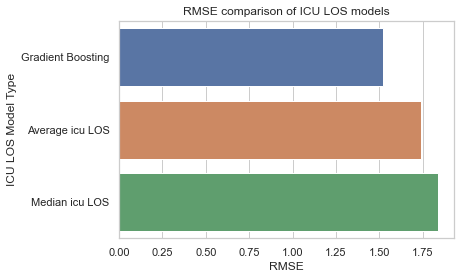

In [120]:
# RMSE plot for writeup
data = pd.DataFrame({'RMSE': [(ml_days_rms**0.5)/y_test_preds.shape[0], 
                             (avg_days_rms**0.5)/y_test_preds.shape[0],
                             (md_days_rms**0.5)/y_test_preds.shape[0]],
                     'ICU LOS Model Type': ['Gradient Boosting', 'Average icu LOS', 'Median icu LOS'] })

fig, ax = plt.subplots()
ax = sns.barplot(x='RMSE', y='ICU LOS Model Type', data=data)
ax.set_title('RMSE comparison of ICU LOS models')
ax.tick_params(top=False, left=False, right=False)

#fig.savefig('', bbox_inches = 'tight')

NameError: name 'LOS_actual' is not defined

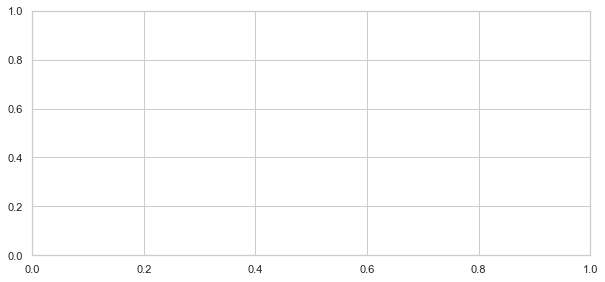

In [107]:
fig, ax = plt.subplots(figsize=(10, 4.5))

ind = np.arange(0,20)
pad = 0.15
width = 0.35

set_actual = ax.bar(pad+ind, LOS_actual, width, color='#4c72b0', alpha=0.8)
set_predict = ax.bar(pad+ind+width, LOS_predict, width, color='#dd8452')

ax.set_ylabel('Length of Stay (days)')
ax.set_xlabel('Admission Event')
ax.set_title('Prediction Model for Hospital Length of Stay (LOS)')

ax.text(0.5, 11, 'Average LOS', fontdict=None, withdash=False, color='red', alpha=0.8)
ax.text(0.5, 7.5, 'Median LOS', fontdict=None, withdash=False, color='gray')
ax.set_xticks(pad + ind + width)
ax.set_ylim(0, 30)
ax.set_xticklabels(list(range(20)))

ax.axhline(y=actual_median_icu_los, xmin=0, xmax=20, ls='--', color='gray')
ax.axhline(y=actual_mean_icu_los, xmin=0, xmax=20, ls='--', color='red', alpha=0.8)

ax.legend( (set_actual, set_predict), ('Actual LOS', 'Predicted LOS'), 
          loc='upper left')
ax.tick_params(bottom=False, top=False, right=False)